# Random numbers from simulations

In [21]:
import numpy as np
import random as rn
import scipy.stats as sts
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

## Shonkwiler Exercise 2.14: Sampling bias for bus waiting times
Suppose the interarrival time for a city bus has an exponential distribution with parameter 1/λ. A passenger arrives at a uniformly random time and records the time until the next bus arrives. What is the expected waiting time? Use a simulation to get an answer. Is the answer surprising? Now suppose instead that the interarrival time is U(0, 2λ). How does this change the situation? (Notice that the expected interarrival time is λ in both cases.)

Expected waiting time:  1.0028207767766195


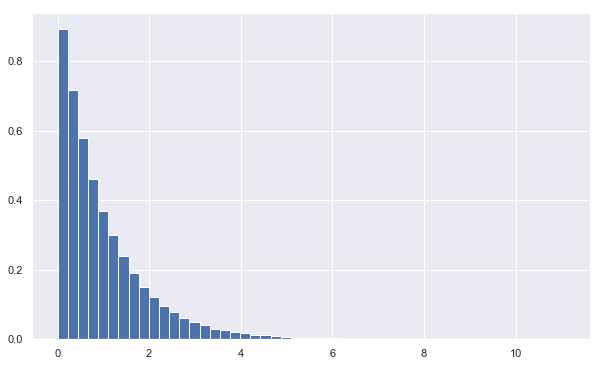

In [24]:
# Exponential interarrival times

waiting_times = []
for _ in range(10**5):
    # Passengers arrive following a random uniform dist
    passengers_time = sts.uniform.rvs(0, 10)
    # buses arrive following an exponential dist
    inter_buses_time = sts.expon.rvs(size=100)
    buses_time = np.cumsum(inter_buses_time)
    passenger = buses_time.searchsorted(passengers_time)
    waiting_times.append(buses_time[passenger] - passengers_time)

print('Expected waiting time: ', np.mean(waiting_times))
plt.figure(figsize=(10, 6))
plt.hist(waiting_times, bins=50, density=True)
plt.show()

Expected waiting time:  0.6789386098705608


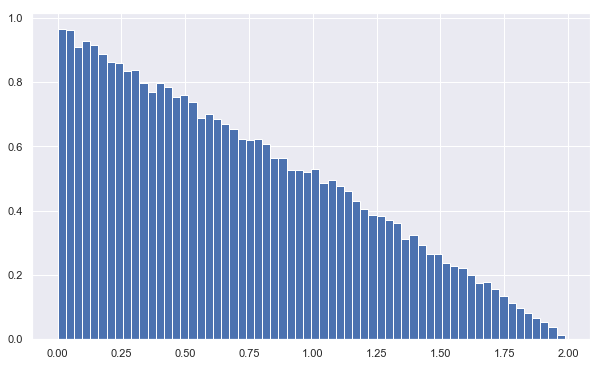

In [23]:
# Uniform interarrival times

waiting_times = []
for _ in range(10**5):
    # Passengers arrive following a random uniform dist
    passengers_time = sts.uniform.rvs(0, 10)
    # buses arrive following an uniform dist U(0, 2)
    inter_buses_time = sts.uniform.rvs(0, 2, size=100)
    buses_time = np.cumsum(inter_buses_time)
    passenger = buses_time.searchsorted(passengers_time)
    waiting_times.append(buses_time[passenger] - passengers_time)

print('Expected waiting time: ', np.mean(waiting_times))
plt.figure(figsize=(10, 6))
plt.hist(waiting_times, bins='auto', density=True)
plt.show()

## Shonkweiler Exercise 2.24: Retirement benefit projection
At age 50 Fannie Mae has 150,000 USD invested and will be investing another 10,000 USD per year until age 70. Each year the investment grows according to an interest rate that is normally distributed with mean 8% and standard deviation 9%. At age 70, Fannie Mae then retires and withdraws 65,000 USD per year until death. Below is given a conditional death probability table. Thus if Fannie Mae lives until age 70, then the probability of dying before age 71 is 0.04979. Simulate this process 1000 times and histogram the amount of money Fannie Mae has at death.

In [56]:
heritage, death_age = [], []
prob_dying = {
    50: 0.00832, 51: 0.00911, 52: 0.00996, 53: 0.01089, 54: 0.01190,
    55: 0.01300, 56: 0.01421, 57: 0.01554, 58: 0.01700, 59: 0.01859,
    60: 0.02034, 61: 0.02224, 62: 0.02431, 63: 0.02657, 64: 0.02904,
    65: 0.03175, 66: 0.03474, 67: 0.03804, 68: 0.04168, 69: 0.04561,
    70: 0.04979, 71: 0.05415, 72: 0.05865, 73: 0.06326, 74: 0.06812,
    75: 0.07337, 76: 0.07918, 77: 0.08570, 78: 0.09306, 79: 0.10119,
    80: 0.10998, 81: 0.11935, 82: 0.12917, 83: 0.13938, 84: 0.15001,
    85: 0.16114, 86: 0.17282, 87: 0.18513, 88: 0.19825, 89: 0.21246,
    90: 0.22814, 91: 0.24577, 92: 0.26593, 93: 0.28930, 94: 0.31666,
    95: 0.35124, 96: 0.40056, 97: 0.48842, 98: 0.66815, 99: 0.72000,
    100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000,
    104: 0.96000, 105: 1.00000}

for i in range(10**3):
    savings, age = 150, 50
    while True:
        if sts.uniform.rvs(0, 1) < prob_dying[age]:
            heritage.append(savings)
            death_age.append(age)
            break
            
        # Save 10K per year if under 70 years old
        elif age < 70:
            savings *= (sts.norm.rvs(.08, .09) + 1)
            savings += 10
            age += 1
        
        # Save 65K per year if over 70 years old
        else: 
            savings *= (sts.norm.rvs(.08, .09) + 1)
            savings -= 65
            age += 1

print('The Mean of heritage: ', round(np.mean(heritage), 2),'K $',
      '\n95 CI of inheritance: ', round(np.percentile(heritage, 5), 2), 
                                  round(np.percentile(heritage, 95), 2),
      '\nMean of age at death: ', np.mean(death_age))

The Mean of heritage:  1284.79 K $ 
95 CI of inheritance:  193.4 3665.95 
Mean of age at death:  73.606


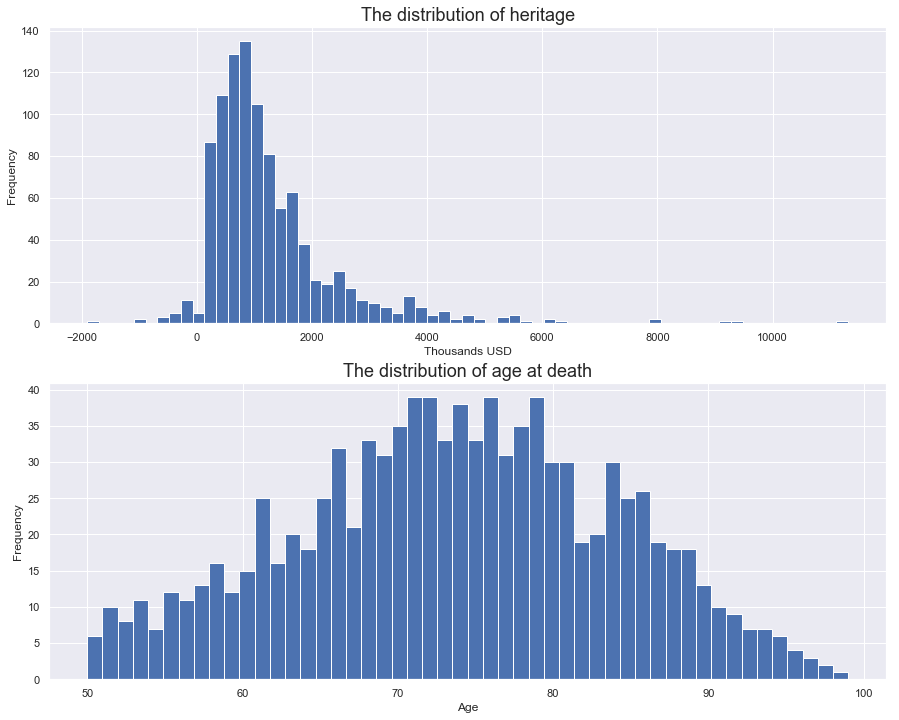

In [57]:
plt.figure(figsize=(15, 12))
plt.subplot(2, 1, 1)
plt.title('The distribution of heritage', fontsize=18)
plt.xlabel('Thousands USD')
plt.ylabel('Frequency')
plt.hist(heritage, bins='auto')
plt.subplot(2, 1, 2)
plt.title('The distribution of age at death', fontsize=18)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.hist(death_age, bins=50)
plt.show()